## **Heart Disease Prediction**

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

### **1. Data Collection and Integration**

In [2]:
# reading dataframe
df = pd.read_csv("framingham.csv")

#### **1.1 Scanning the DataFrame**

In [3]:
#df view:
df.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
868,0,40,2.0,1,30.0,0.0,0,0,0,202.0,104.0,76.0,19.93,70.0,62.0,1
1728,0,46,1.0,0,0.0,0.0,0,1,0,239.0,166.5,107.0,19.27,110.0,70.0,0
901,1,59,2.0,1,11.0,0.0,0,0,0,176.0,134.5,87.0,31.76,80.0,93.0,0
1285,0,40,2.0,0,0.0,0.0,0,0,0,233.0,108.5,75.0,28.30,60.0,73.0,0
1485,1,52,2.0,1,20.0,0.0,0,0,1,258.0,132.0,80.0,27.52,90.0,268.0,1
1104,1,57,4.0,0,0.0,NaN,0,1,0,195.0,162.0,108.0,32.65,85.0,73.0,0
1302,0,63,1.0,0,0.0,0.0,0,1,0,226.0,172.5,98.0,26.47,87.0,81.0,0
2622,1,53,4.0,0,0.0,0.0,0,0,0,241.0,113.0,84.0,28.27,62.0,73.0,0
1822,1,48,1.0,1,35.0,0.0,0,0,0,188.0,120.0,82.5,31.67,80.0,68.0,0
3292,0,41,3.0,1,15.0,0.0,0,0,0,205.0,120.0,80.0,20.67,86.0,64.0,0


In [4]:
#datatypes of columns and number of null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
# dimensions
df.shape

(4240, 16)

In [6]:
# basic description in terms of statistics
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


In [7]:
# shows that this is a classification problem because the label has values 0 and 1
df["TenYearCHD"].unique()

array([0, 1])

### **2. Data Cleaning and Filtering**

In [8]:
# deleting/dropping the education feature as it is not useful to the model
# df = df.drop(['education'] , axis=1)

In [9]:
# dimensions
df.shape

(4240, 16)

In [10]:
# columns with number of missing values
df.isnull().sum()#/len(df)*100

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### **2.1 Dealing With Missing Values**

In [11]:
# dropping rows with less % of missing values and rows having missing values of type 0/1
df = df.dropna(subset = ['heartRate'])

In [12]:
# filling categorical columns with most frequent value
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [13]:
# filling numerical columns with median values because data is not symmetric
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [14]:
df.isnull().sum()/len(df)*100

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [15]:
#checking for duplications
df.duplicated().sum()

np.int64(0)

#### **2.2 Feature Engineering**

In [16]:
# finding correlation coefficient of every feature in comparison to Target/TenYearCHD
print(df.corr()["TenYearCHD"].abs().sort_values(ascending=False))

TenYearCHD        1.000
age               0.225
sysBP             0.216
prevalentHyp      0.177
diaBP             0.146
glucose           0.121
diabetes          0.097
male              0.088
BPMeds            0.087
totChol           0.082
BMI               0.074
prevalentStroke   0.062
cigsPerDay        0.058
education         0.053
heartRate         0.023
currentSmoker     0.019
Name: TenYearCHD, dtype: float64


In [17]:
# removing features with very less correlation coefficient ,
df = df.drop(['education'] , axis=1)
df = df.drop(['heartRate'] , axis=1)
df = df.drop(['currentSmoker'] , axis=1)

In [18]:
df.shape

(4239, 13)

### **3. Training and Testiing**

#### **3.1 Train-Test Split**

In [19]:
# impporting splitting method for splitting the dataframe into training-testing
from sklearn.model_selection import train_test_split

predictors = df.drop("TenYearCHD",axis=1)
target = df["TenYearCHD"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [20]:
X_train.shape

(3391, 12)

In [21]:
X_test.shape

(848, 12)

In [22]:
Y_train.shape

(3391,)

In [23]:
Y_test.shape

(848,)

#### **3.2 Model-Fitting**

In [24]:
# importing useful metrics to test the performance of the model 
# model-fitting
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

##### **3.2.1 Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
Y_pred_lr.shape

(848,)

In [27]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.67 %


In [28]:
# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Make predictions
Y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_logreg):.2f}")
print(f"Precision: {precision_score(Y_test, Y_pred_logreg):.2f}")
print(f"Recall: {recall_score(Y_test, Y_pred_logreg):.2f}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_logreg):.2f}")
#print(classification_report(Y_test, Y_pred_logreg))

Logistic Regression:
Accuracy: 0.85
Precision: 0.62
Recall: 0.06
F1 Score: 0.11


C:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


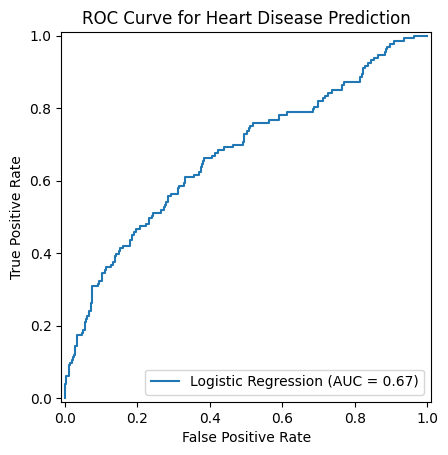

ROC-AUC Score: 0.67


In [29]:
# Predict probabilities for the positive class
Y_probs = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_probs)

# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_probs)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Logistic Regression").plot()

plt.title('ROC Curve for Heart Disease Prediction')
plt.show()

print(f"ROC-AUC Score: {roc_auc:.2f}")

##### **3.2.3 Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [31]:
Y_pred_rf.shape

(848,)

In [32]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
print(f"Precision: {precision_score(Y_test, Y_pred_rf):.2f}")
print(f"Recall: {recall_score(Y_test, Y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_logreg):.2f}")

The accuracy score achieved using Random Forest is: 85.38 %
Precision: 0.76
Recall: 0.10
F1 Score: 0.11


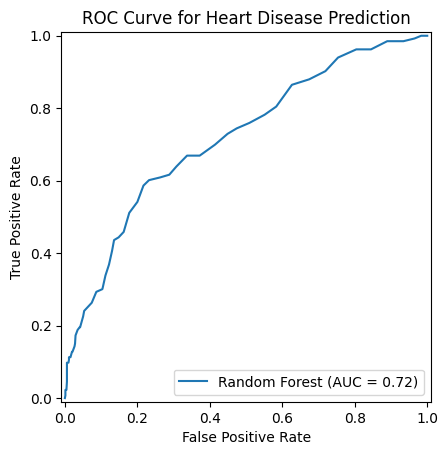

ROC-AUC Score: 0.72


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Predict probabilities for the positive class
Y_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_probs)

# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_probs)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Random Forest").plot()

plt.title('ROC Curve for Heart Disease Prediction')
plt.show()

print(f"ROC-AUC Score: {roc_auc:.2f}")

#### **3.3 Comparing Results**

In [34]:
scores = [score_lr,score_rf]
algorithms = ["Logistic Regression","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 84.67 %
The accuracy score achieved using Random Forest is: 85.38 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

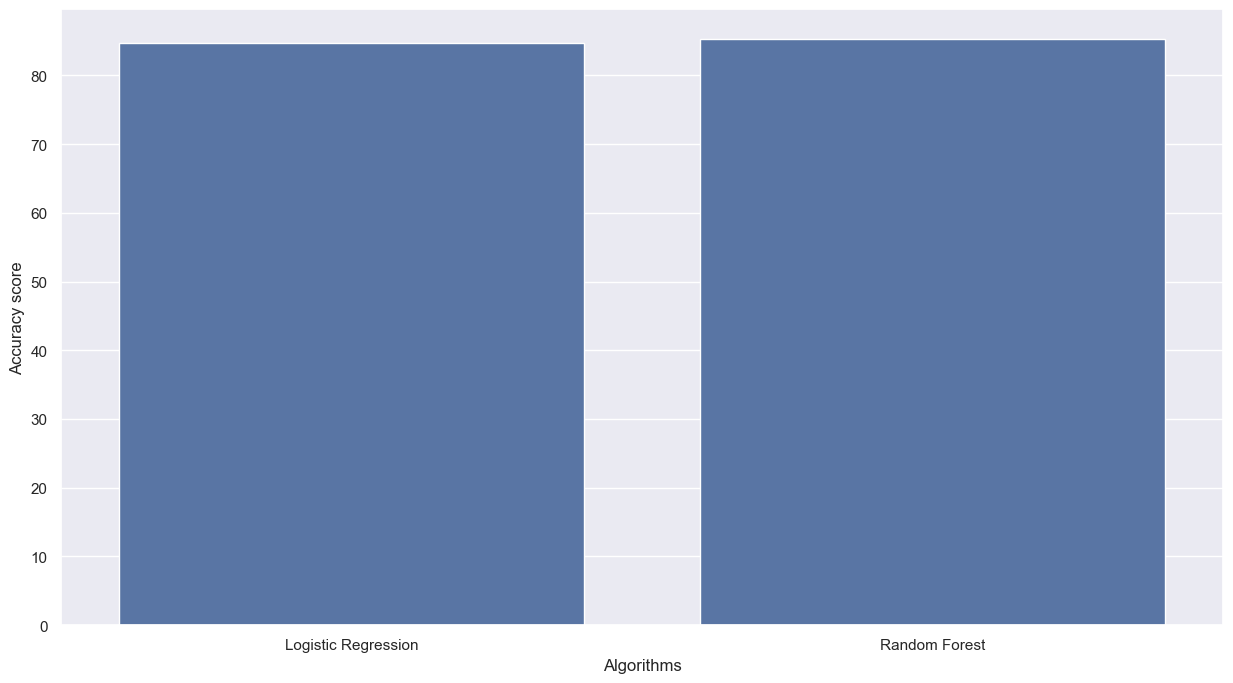

In [35]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)